In [1]:
# Install Qiskit, Aer and pylatexenc
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 82.6 MB/s eta 0:00:00


In [5]:
#imports
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np
from IPython.display import display
sim = AerSimulator()

**Task 1: Predict the statevector after H on |0>, |1>, |+>, |->.**

|0> -> statevector: [0.70710678+0.j 0.70710678+0.j]


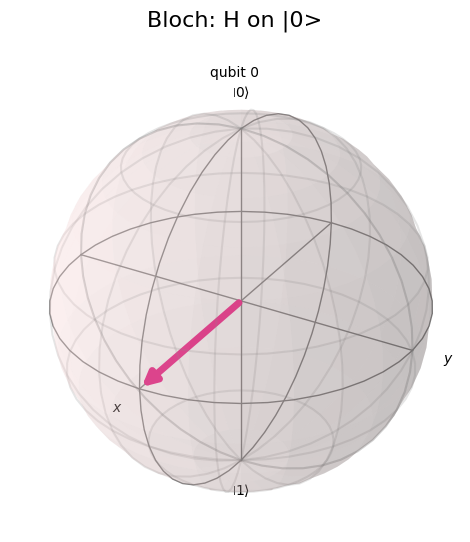

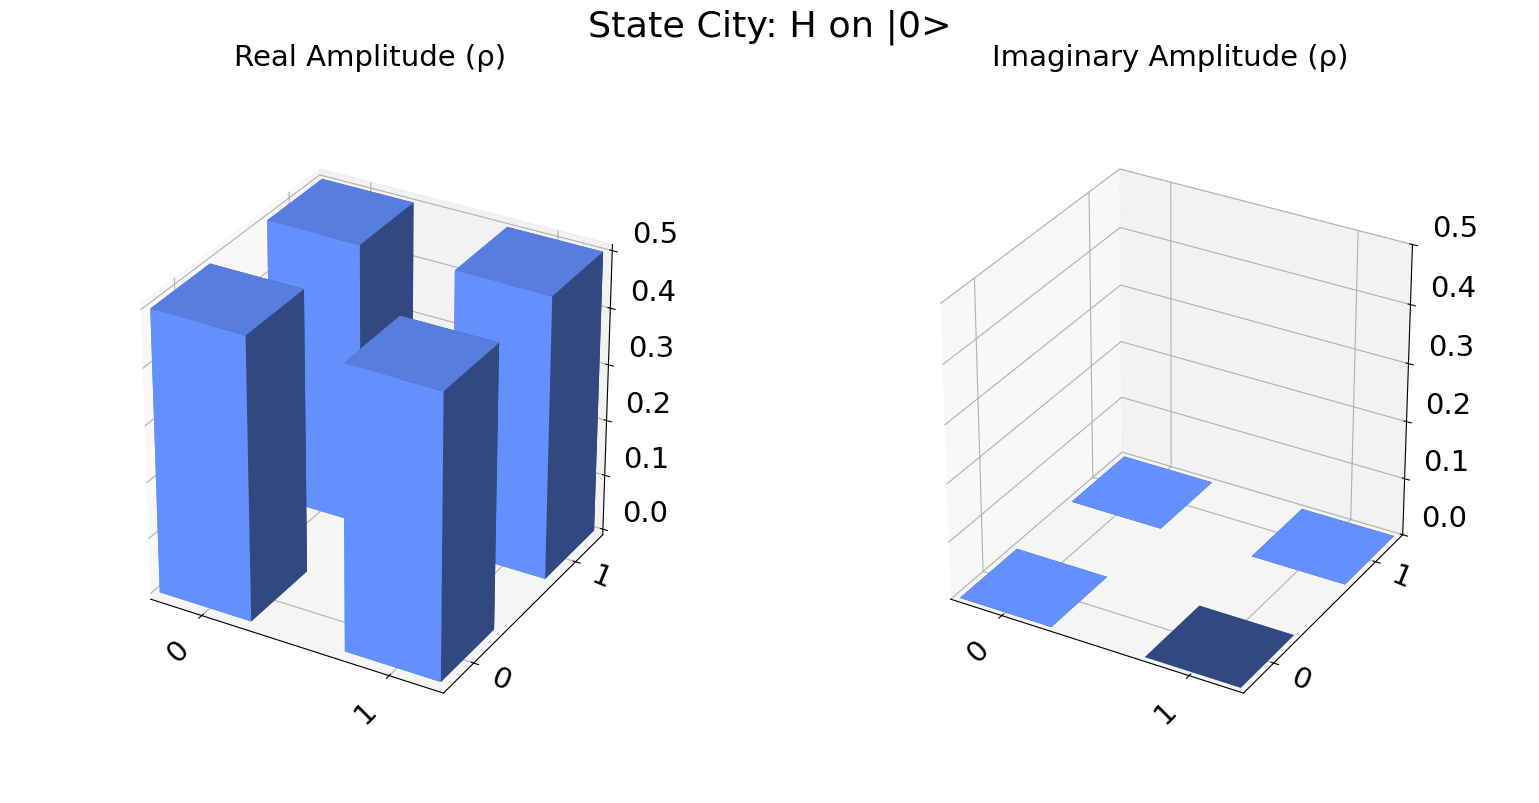

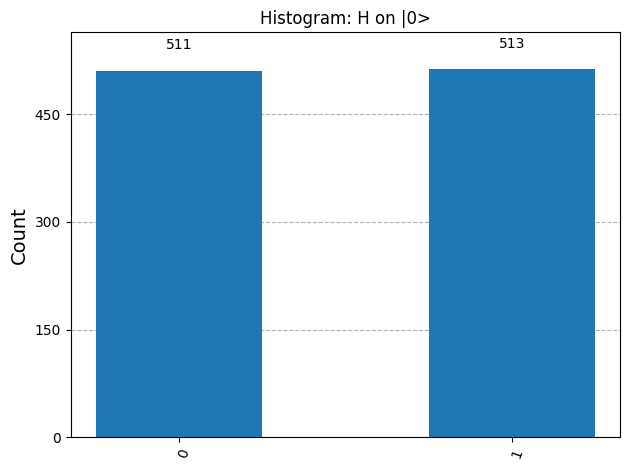

|1> -> statevector: [ 0.70710678+0.j -0.70710678+0.j]


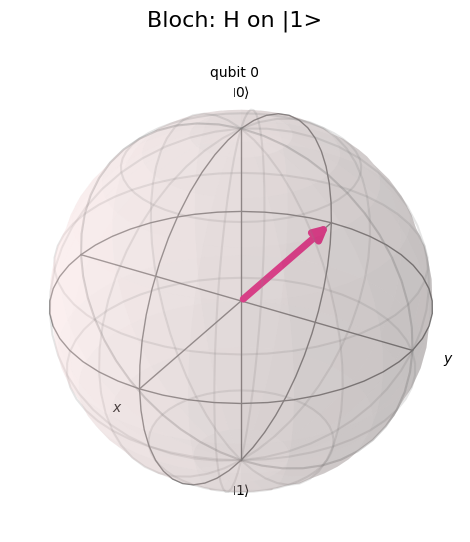

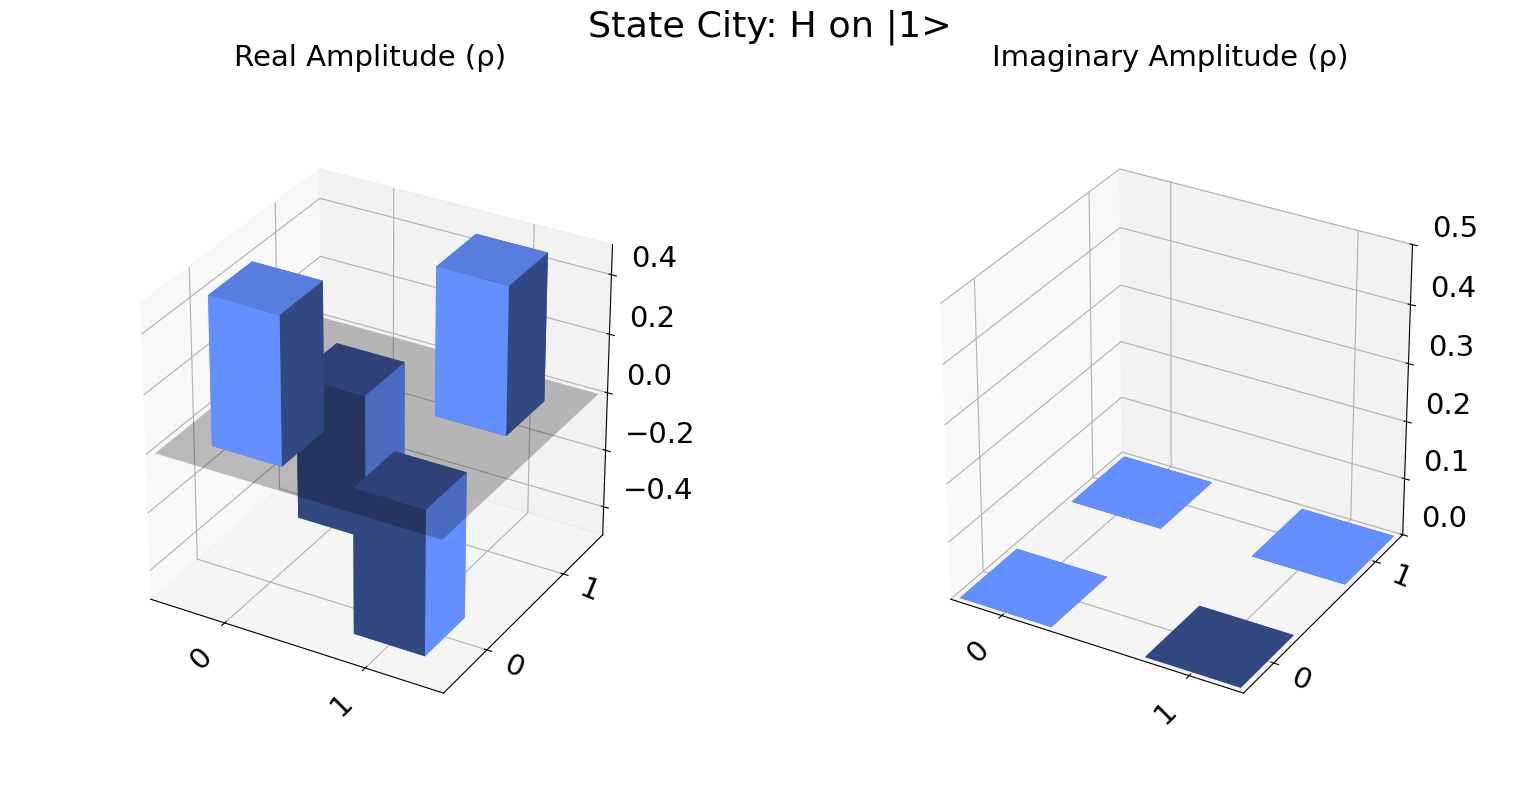

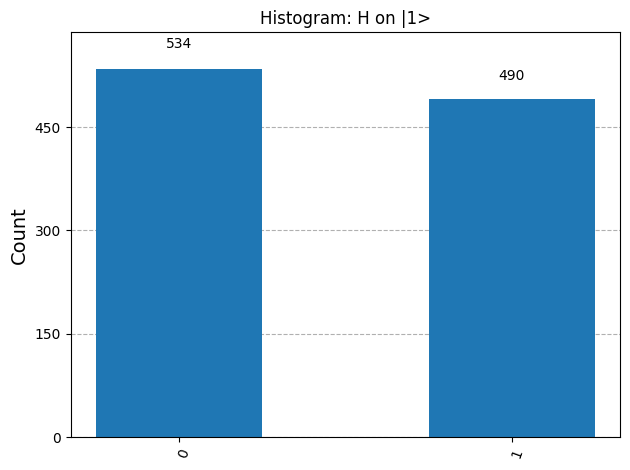

|+> -> statevector: [1.+0.j 0.+0.j]


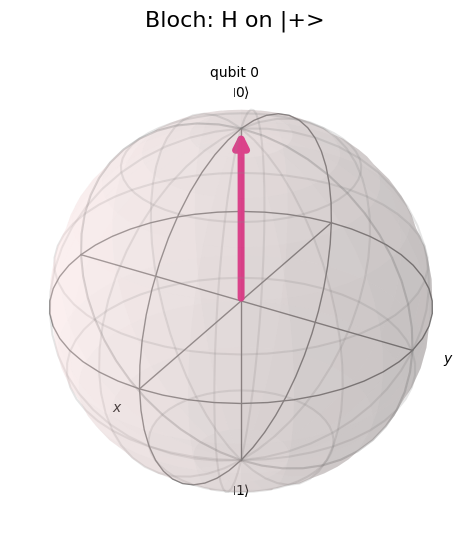

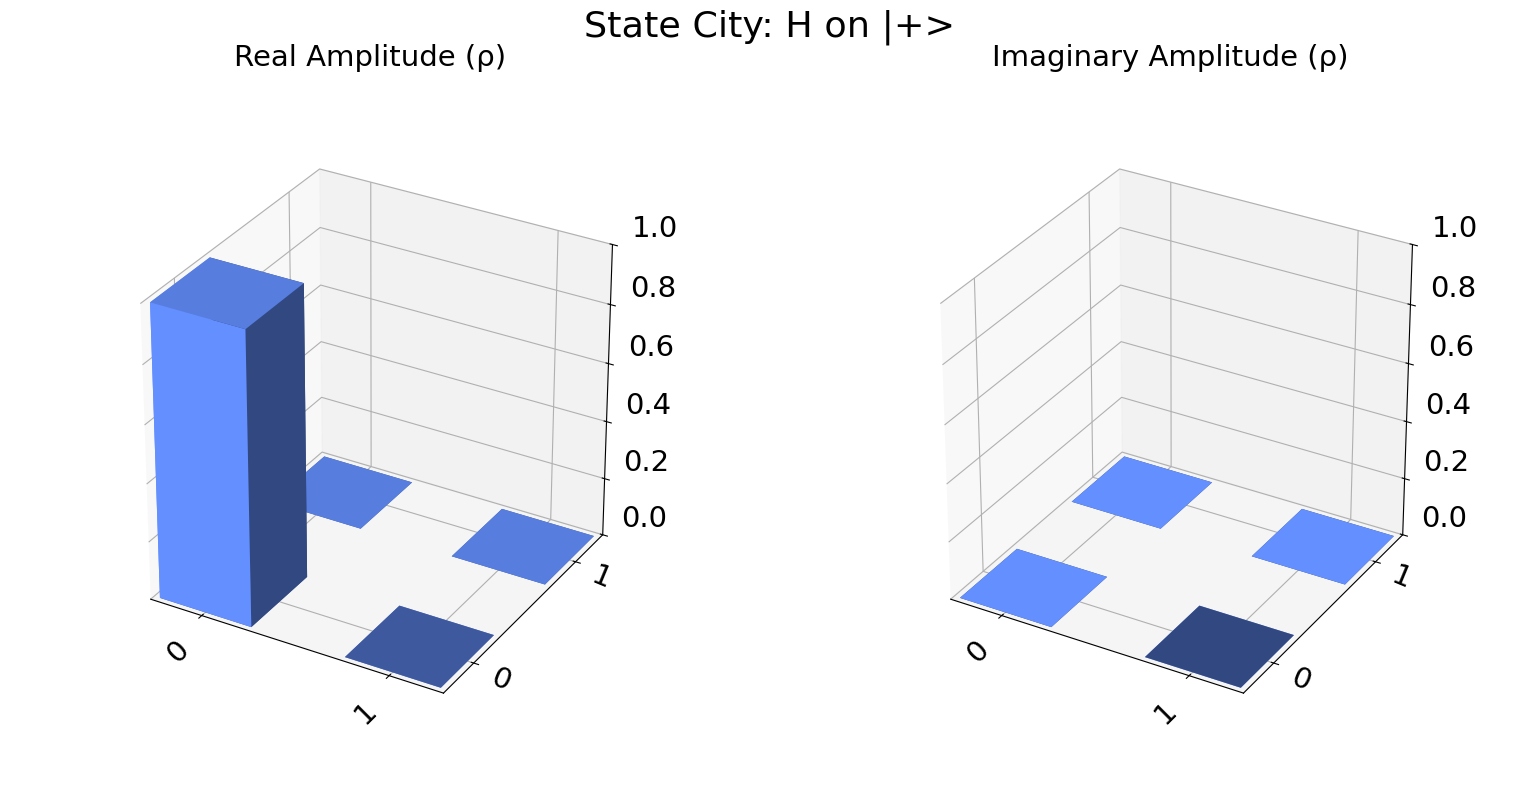

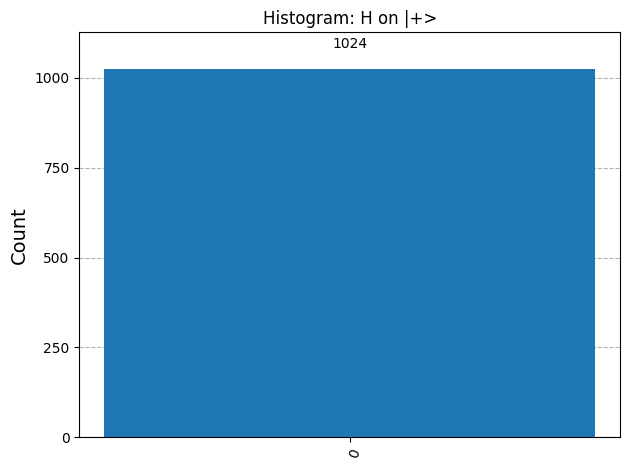

|-> -> statevector: [0.+0.j 1.+0.j]


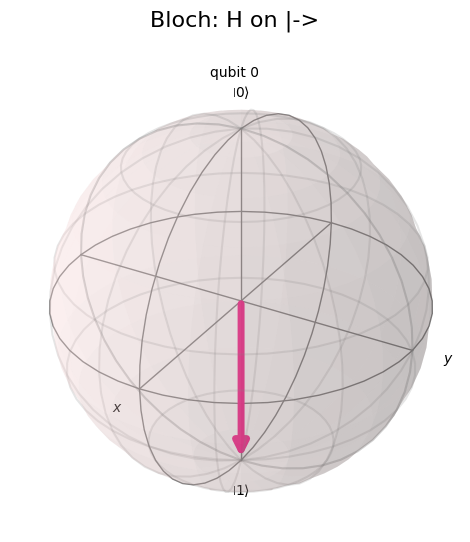

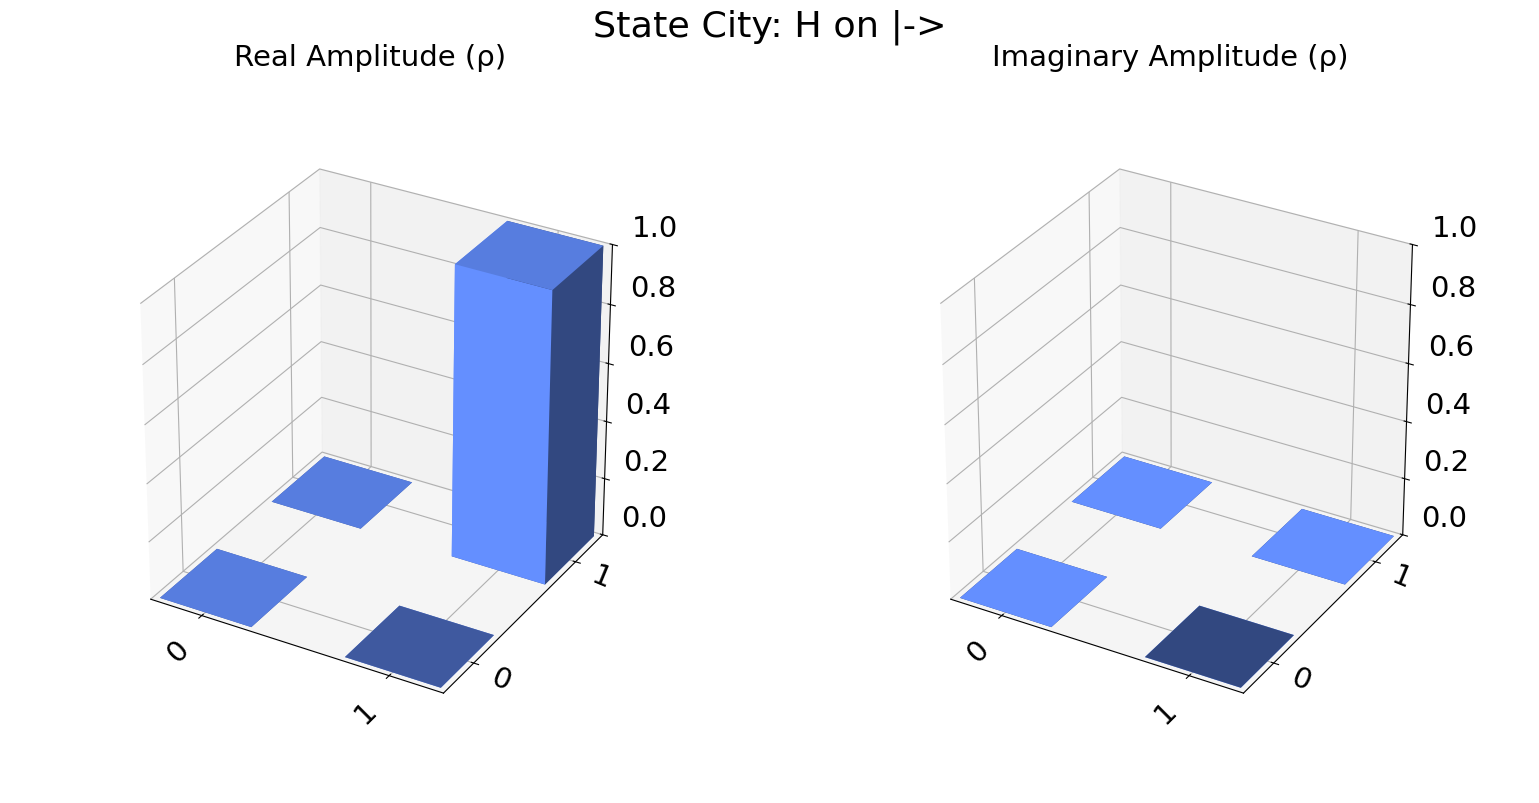

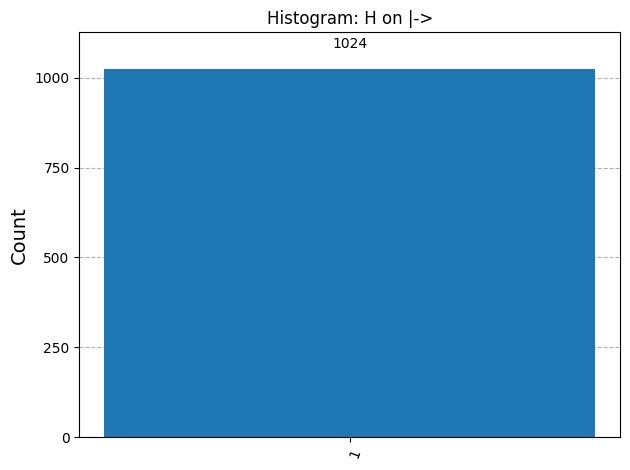

In [6]:
def run_and_show(init_state, label):
    qc = QuantumCircuit(1,1)
    qc.initialize(init_state, 0)
    qc.h(0)
    qc.measure(0,0)

    qc_state = QuantumCircuit(1)
    qc_state.initialize(init_state,0)
    qc_state.h(0)
    sv = Statevector.from_instruction(qc_state)

    print(label, "-> statevector:", sv.data)
    display(plot_bloch_multivector(sv, title=f"Bloch: H on {label}"))
    display(plot_state_city(sv, title=f"State City: H on {label}"))
    res = sim.run(transpile(qc, sim), shots=1024).result()
    display(plot_histogram(res.get_counts(), title=f"Histogram: H on {label}"))

# Run four cases:
run_and_show(np.array([1,0]), "|0>")
run_and_show(np.array([0,1]), "|1>")
run_and_show(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")
run_and_show(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")

**Task 2: Create a 3-qubit system with H⊗H⊗H and analyze measurement probabilities.**

--- 3-Qubit H⊗H⊗H on |000> ---
Statevector: [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


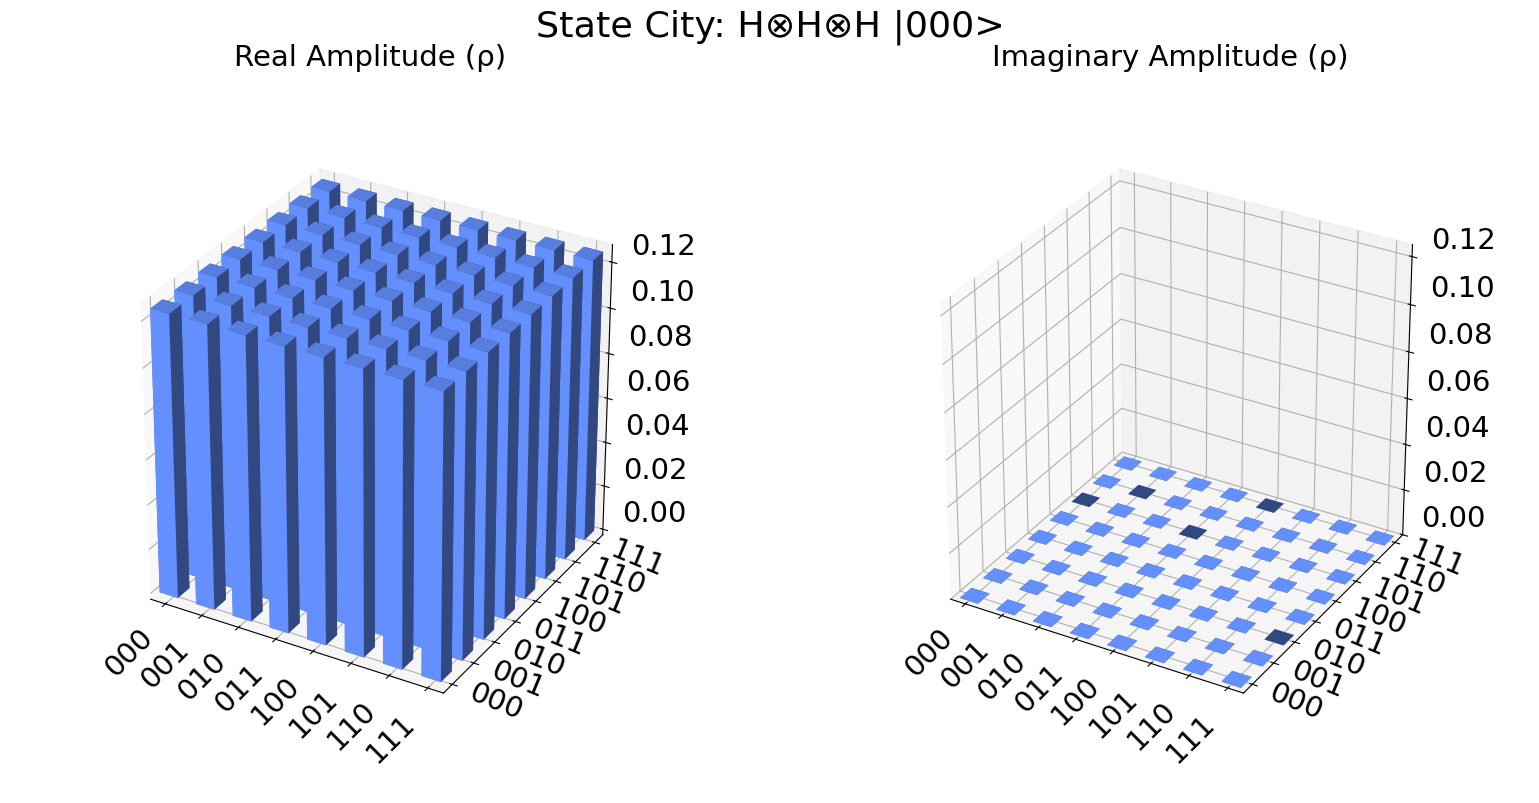

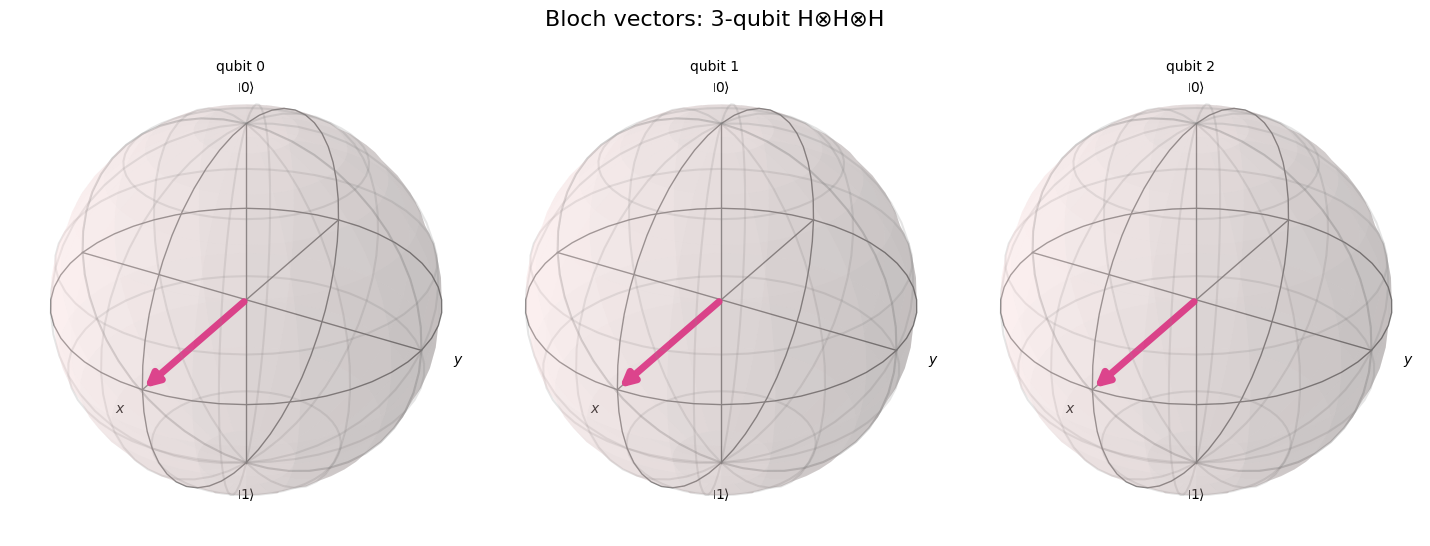

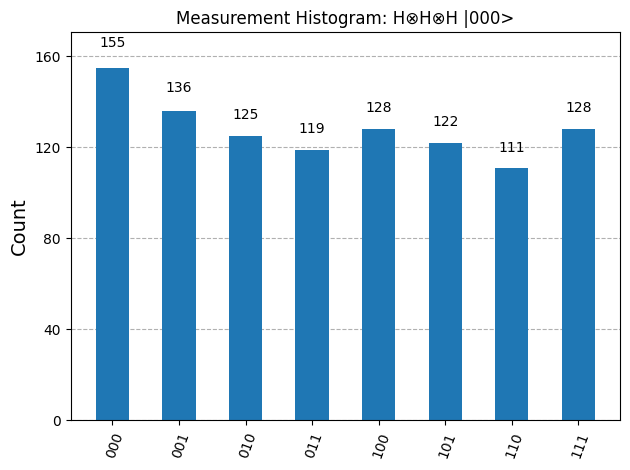

Analytical: equal probability for all 8 basis states.



In [7]:
qc3 = QuantumCircuit(3, 3)
qc3.h([0, 1, 2])
qc3.measure([0, 1, 2], [0, 1, 2])

qc3_state = QuantumCircuit(3)
qc3_state.h([0, 1, 2])
state3 = Statevector.from_instruction(qc3_state)

print("--- 3-Qubit H⊗H⊗H on |000> ---")
print("Statevector:", state3.data)
display(plot_state_city(state3, title="State City: H⊗H⊗H |000>"))
display(plot_bloch_multivector(state3, title="Bloch vectors: 3-qubit H⊗H⊗H"))

sim = AerSimulator()
qc3_t = transpile(qc3, sim)
result3 = sim.run(qc3_t, shots=1024).result()
counts3 = result3.get_counts()
display(plot_histogram(counts3, title="Measurement Histogram: H⊗H⊗H |000>"))
print("Analytical: equal probability for all 8 basis states.\n")


**Task 3: Apply H + CX + CX on 3 qubits and analyze correlations.**

 3-Qubit H + CX + CX -
Statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


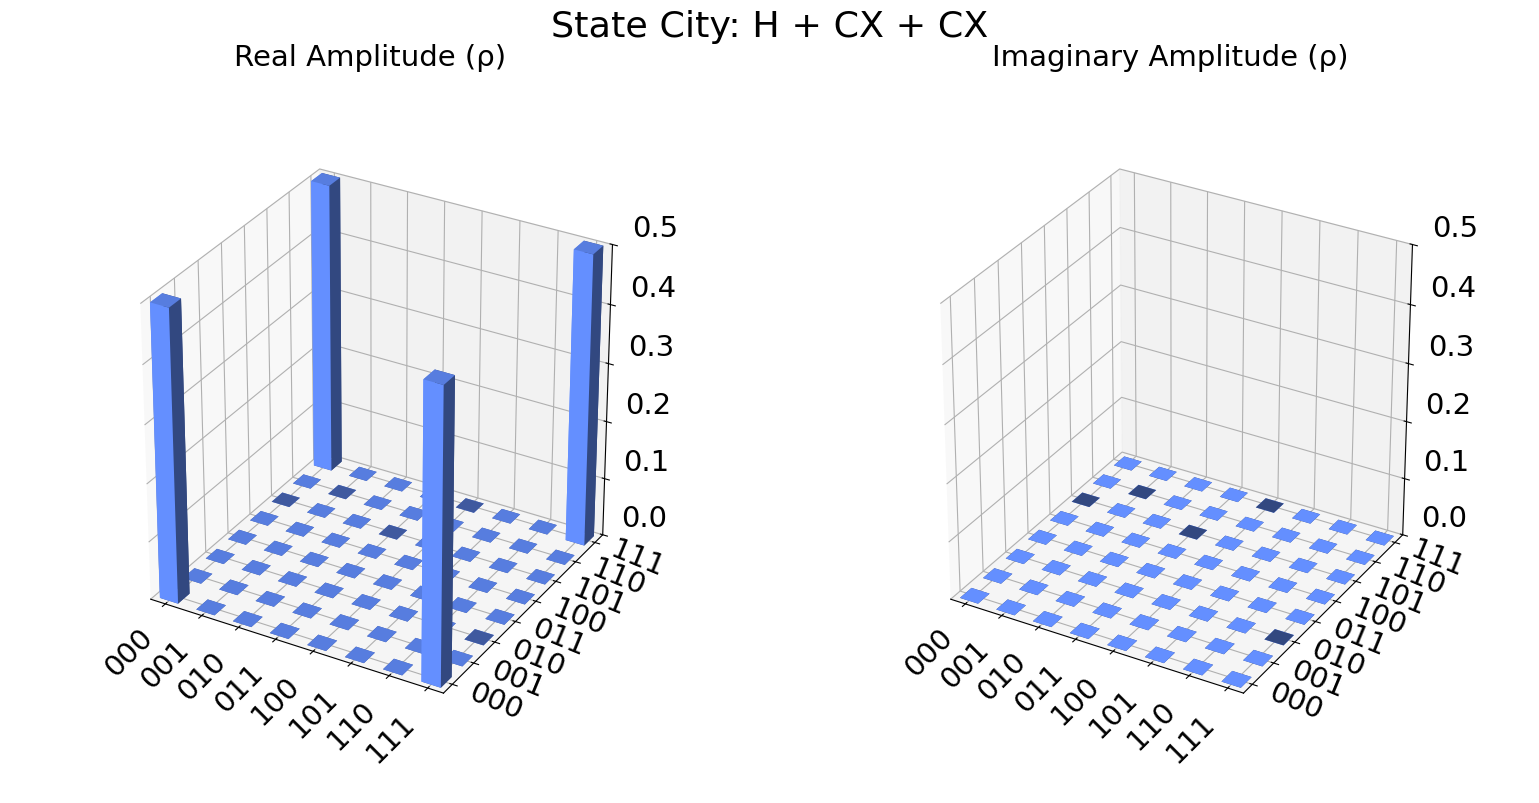

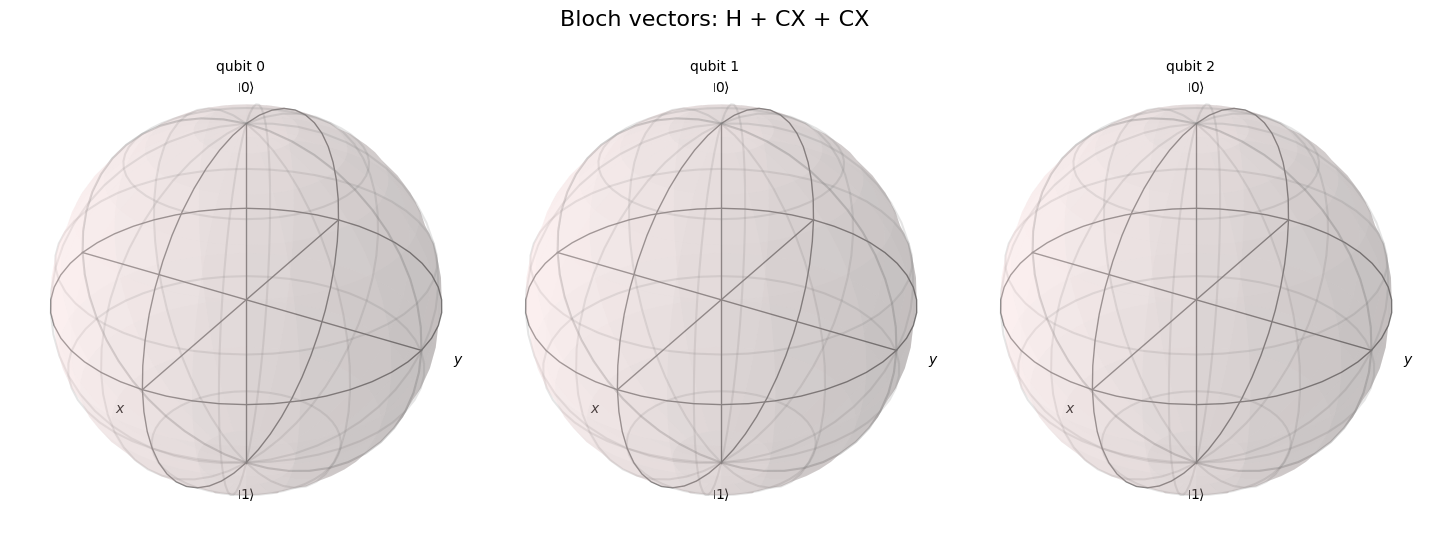

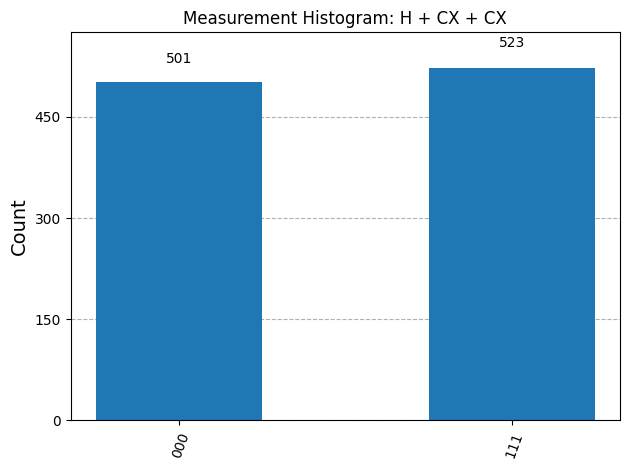

Analytical: correlated outcomes across qubits.



In [8]:
qc_corr = QuantumCircuit(3, 3)
qc_corr.h(0)
qc_corr.cx(0, 1)
qc_corr.cx(1, 2)
qc_corr.measure([0, 1, 2], [0, 1, 2])

qc_corr_state = QuantumCircuit(3)
qc_corr_state.h(0)
qc_corr_state.cx(0, 1)
qc_corr_state.cx(1, 2)
state_corr = Statevector.from_instruction(qc_corr_state)

print(" 3-Qubit H + CX + CX -")
print("Statevector:", state_corr.data)
display(plot_state_city(state_corr, title="State City: H + CX + CX"))
display(plot_bloch_multivector(state_corr, title="Bloch vectors: H + CX + CX"))

qc_corr_t = transpile(qc_corr, sim)
result_corr = sim.run(qc_corr_t, shots=1024).result()
counts_corr = result_corr.get_counts()
display(plot_histogram(counts_corr, title="Measurement Histogram: H + CX + CX"))
print("Analytical: correlated outcomes across qubits.\n")


**Task 4: Apply H twice on |1> and verify the original state.**

Statevector after H,H on |1>: [0.+0.j 1.+0.j]


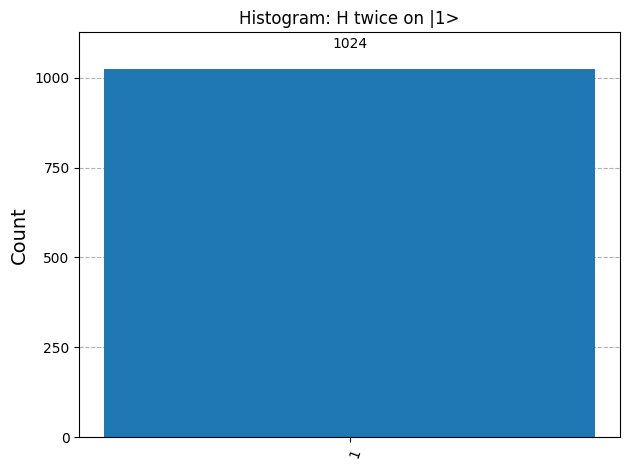

In [9]:
sim = AerSimulator()
qc = QuantumCircuit(1,1)
qc.initialize([0,1],0)  # |1>
qc.h(0)
qc.h(0)
qc.measure(0,0)

qc_state = QuantumCircuit(1)
qc_state.initialize([0,1],0)
qc_state.h(0)
qc_state.h(0)
sv = Statevector.from_instruction(qc_state)
print("Statevector after H,H on |1>:", sv.data)

res = sim.run(transpile(qc, sim), shots=1024).result()
display(plot_histogram(res.get_counts(), title="Histogram: H twice on |1>"))


**Task 5: Use Bloch sphere plots to observe qubit rotations after Hadamard.**

|0> before: [1.+0.j 0.+0.j]  after H: [0.70710678+0.j 0.70710678+0.j]


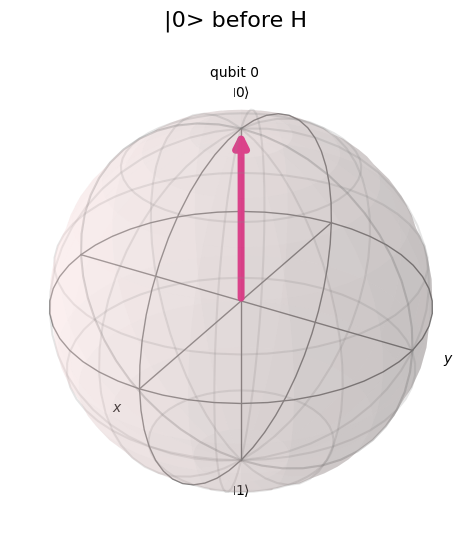

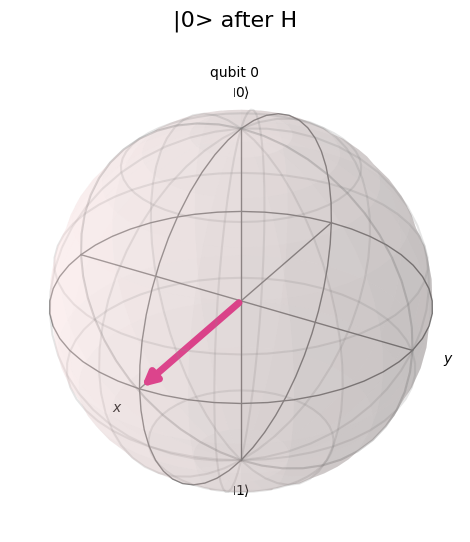

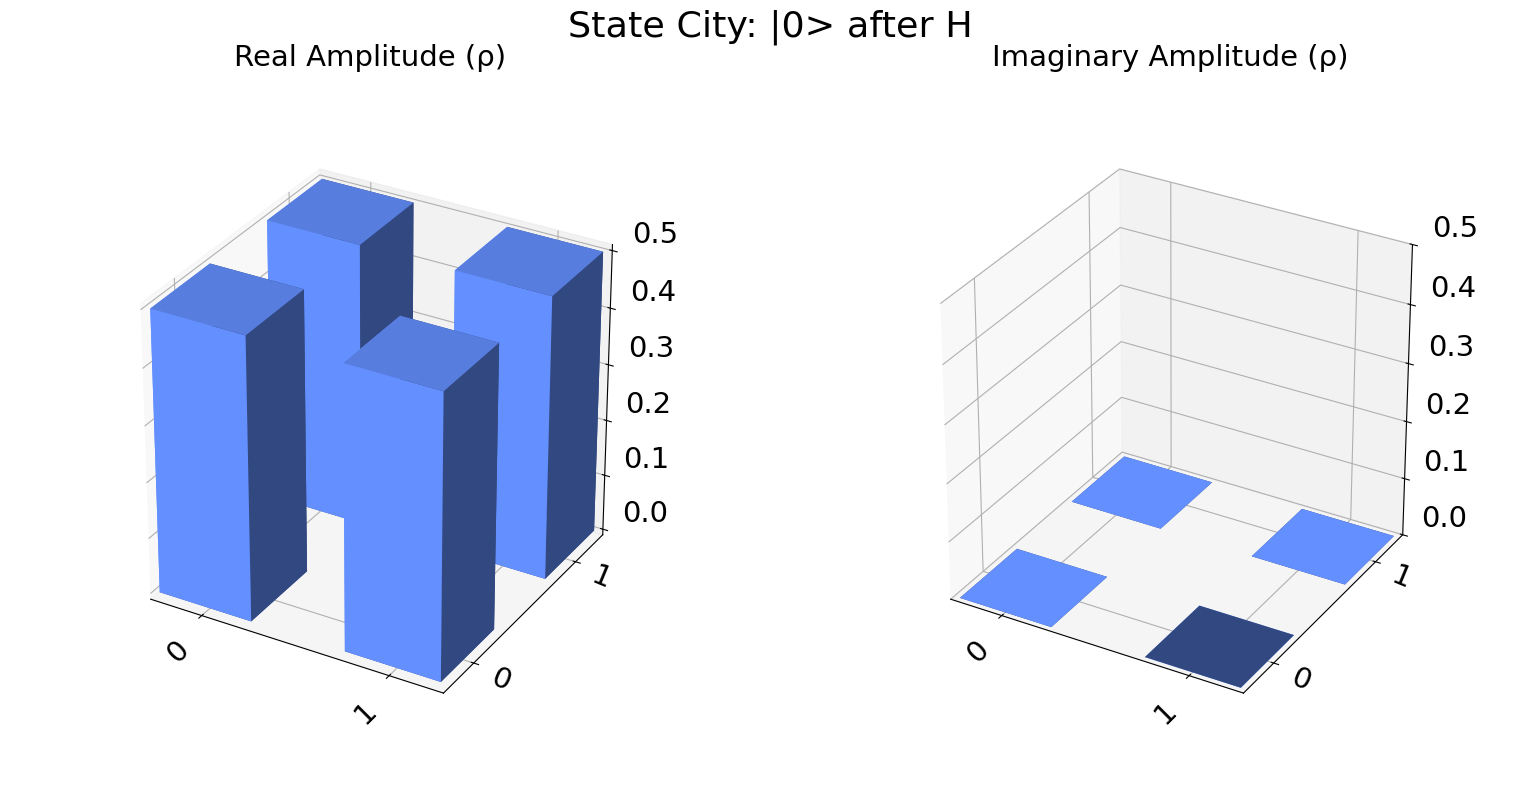

|1> before: [0.+0.j 1.+0.j]  after H: [ 0.70710678+0.j -0.70710678+0.j]


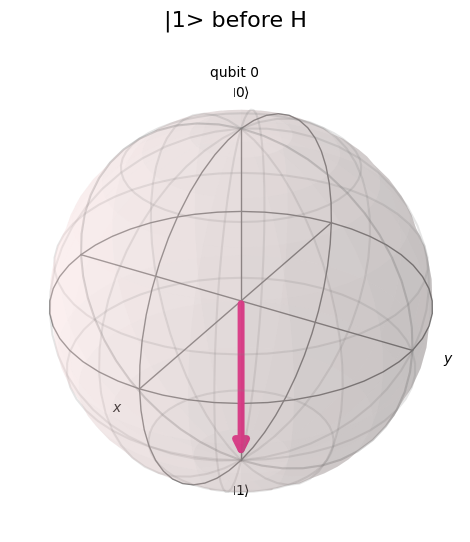

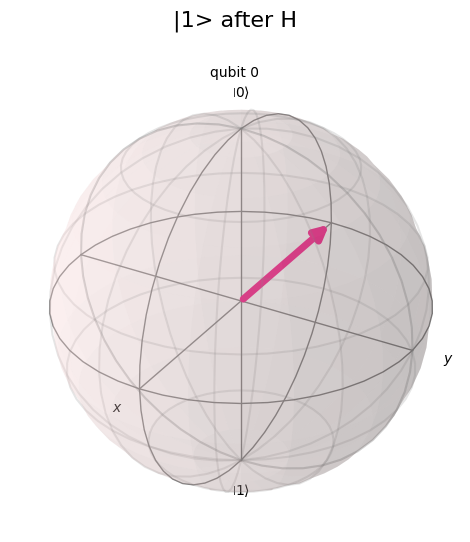

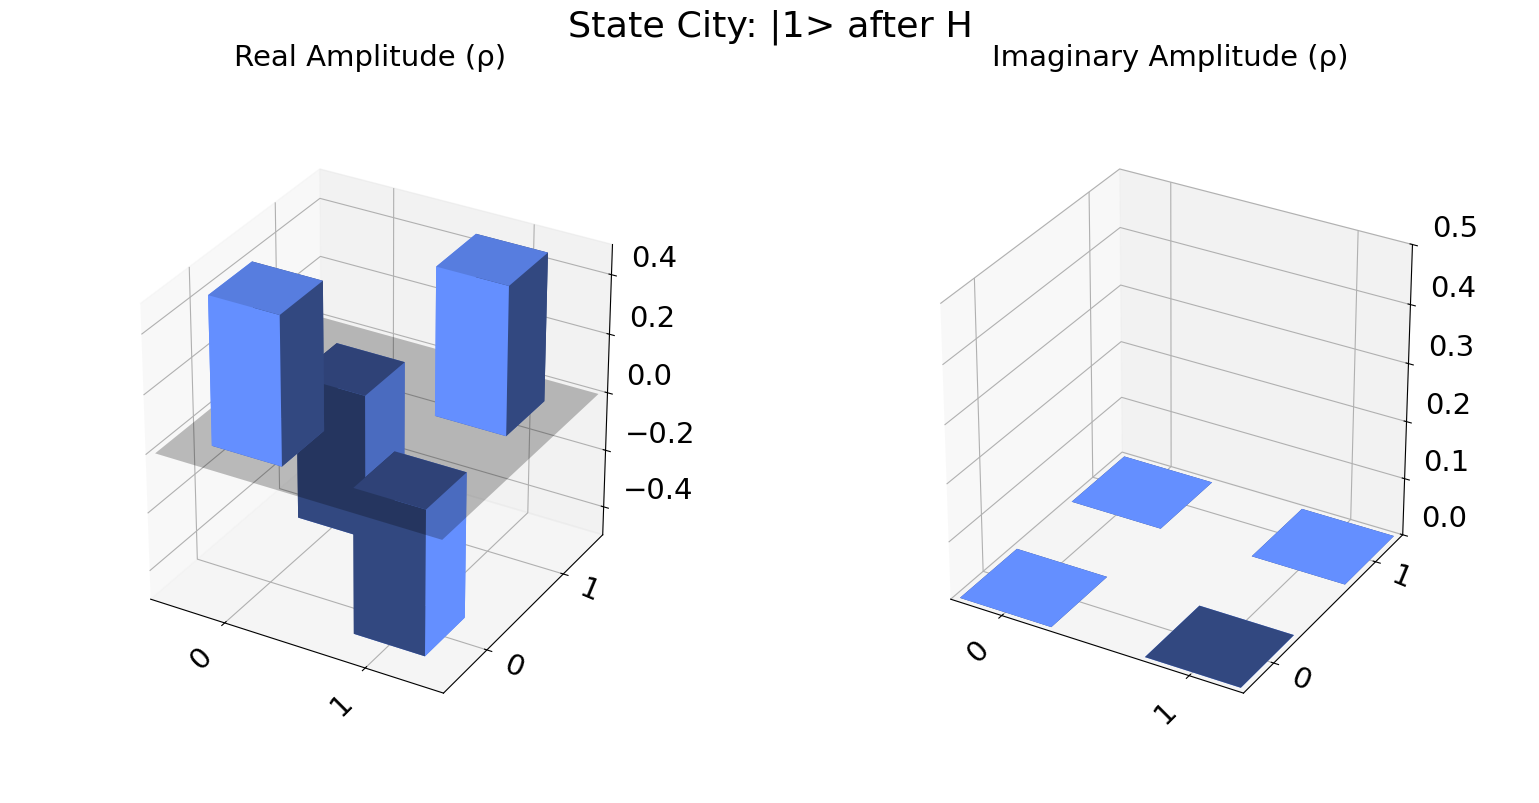

In [10]:
def bloch_before_after(state_vec, label):
    s_before = Statevector(state_vec)
    qc = QuantumCircuit(1)
    qc.initialize(state_vec,0)
    qc.h(0)
    s_after = Statevector.from_instruction(qc)
    print(f"{label} before:", s_before.data, " after H:", s_after.data)
    display(plot_bloch_multivector(s_before, title=f"{label} before H"))
    display(plot_bloch_multivector(s_after, title=f"{label} after H"))
    display(plot_state_city(s_after, title=f"State City: {label} after H"))

bloch_before_after([1,0], "|0>")
bloch_before_after([0,1], "|1>")